In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/研究所課程/統計分析程式/資料集/StudentsPerformance.csv')

In [ ]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
#檢查資料型態
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [ ]:
#檢查資料是否有缺值
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
# -------- 數學、閱讀、寫作三科分數加總及平均 --------
df['Total'] = (df['math score']+df['reading score']+df['writing score'])/3
for i in range(len(df['Total'])):
  df['Total'][i] = round(df['Total'][i],2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df = df.drop('math score',axis=1)
df = df.drop('reading score',axis=1)
df = df.drop('writing score',axis=1)

In [ ]:
# 篩選出兩類的學生
df_no = df[df['test preparation course']=="none"]
df_co = df[df['test preparation course']=="completed"]

In [ ]:
df_shs_R = df_no.iloc[:,5:6]
df_hs_R = df_co.iloc[:,5:6]

In [ ]:
df_shs_RR = df_shs_R.to_numpy().flatten()
df_hs_RR = df_hs_R.to_numpy().flatten()

In [ ]:
df_no.count()

gender                         642
race/ethnicity                 642
parental level of education    642
lunch                          642
test preparation course        642
Total                          642
dtype: int64

In [ ]:
df_co.count()

gender                         358
race/ethnicity                 358
parental level of education    358
lunch                          358
test preparation course        358
Total                          358
dtype: int64

In [ ]:
df_mix2 = df_no.append(df_co)

In [ ]:
df_mix2 = df_mix2.reset_index(drop=True)
df_mix2

,gender,race/ethnicity,parental level of education,lunch,test preparation course,Total
0,female,group B,bachelor's degree,standard,none,72.67
1,female,group B,master's degree,standard,none,92.67
2,male,group A,associate's degree,free/reduced,none,49.33
3,male,group C,some college,standard,none,76.33
4,female,group B,associate's degree,standard,none,77.33
...,...,...,...,...,...,...
995,male,group E,high school,free/reduced,completed,80.67
996,female,group B,some high school,standard,completed,75.00
997,female,group E,master's degree,standard,completed,94.00
998,female,group C,high school,free/reduced,completed,65.00


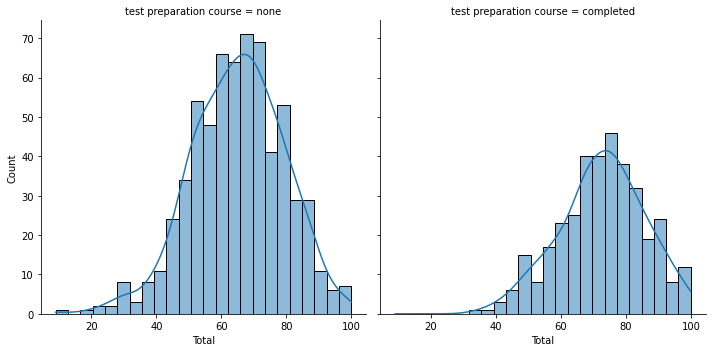

In [ ]:
import seaborn as sns
sns.displot(data=df_mix2,x='Total',col='test preparation course',kde='true')

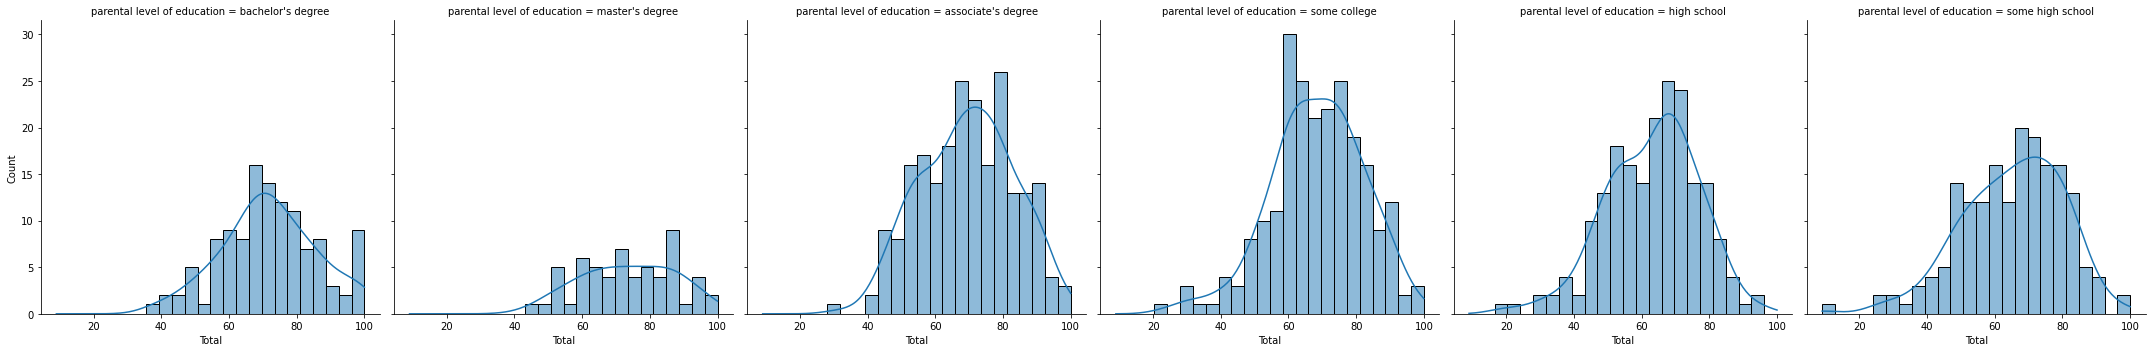

In [ ]:
sns.displot(data=df_mix2,x='Total',col='parental level of education',kde='true')

In [ ]:
df1 = df_mix2['Total'].to_numpy()
df2 =df_mix2['test preparation course'].to_numpy()

In [ ]:
N_df = pd.DataFrame({'Total':df1,'Test':df2})

In [ ]:
N_df

,Total,Test
0,72.67,none
1,92.67,none
2,49.33,none
3,76.33,none
4,77.33,none
...,...,...
995,80.67,completed
996,75.00,completed
997,94.00,completed
998,65.00,completed


In [ ]:
N_df_2 = N_df[N_df['Test']=='completed']
N_df_1 = N_df[N_df['Test']=='none']

In [ ]:
N_df_1 = N_df_1.drop('Test',axis=1)
N_df_1 = N_df_1.rename(columns={'Total':"none"})

In [ ]:
N_df_2 = N_df_2.drop('Test',axis=1)
N_df_2 = N_df_2.rename(columns={'Total':"completed"})

In [ ]:
N_df_2 = pd.Series(N_df_2["completed"].values,name="completed")
N_df_1 = pd.Series(N_df_1["none"].values,name="none")

In [ ]:
KK = pd.concat([N_df_1,N_df_2],axis=1)

In [ ]:
KK

,none,completed
0,72.67,82.33
1,92.67,91.67
2,49.33,65.00
3,76.33,73.33
4,77.33,44.67
...,...,...
637,69.00,NaN
638,69.33,NaN
639,62.67,NaN
640,57.33,NaN


T-Test

In [ ]:
import numpy as np

In [ ]:
print('None:',np.var(df_shs_RR),'Completed:' ,np.var(df_hs_RR))

None: 200.94522052411176 Completed: 169.49196703676537


In [ ]:
223.26228499734717/181.60957426853395

1.229353055292251

In [ ]:
mean1 = np.mean(df_shs_RR)
mean2 = np.mean(df_hs_RR)

In [ ]:
std1 = np.std(df_shs_RR)
std2 = np.std(df_hs_RR)

In [ ]:
nobs1 = len(df_shs_RR)
nobs2 = len(df_hs_RR)

In [ ]:
modified_std1 = np.sqrt(np.float32(nobs1)/np.float32(nobs1-1)) * std1
modified_std2 = np.sqrt(np.float32(nobs2)/np.float32(nobs2-1)) * std2

In [ ]:
statistic, pvalue = stats.ttest_ind_from_stats( mean1=mean1, std1=modified_std1, nobs1=nobs1,
               mean2=mean2, std2=modified_std2, nobs2=nobs2 )

In [ ]:
statistic

-8.391129735727805

In [ ]:
pvalue

1.631376440841688e-16

In [ ]:
df_mix = df_mix2.drop('race/ethnicity',axis=1)
df_mix = df_mix.drop('lunch',axis=1)
df_mix = df_mix.drop('gender',axis=1)
df_mix

,parental level of education,test preparation course,Total
0,bachelor's degree,none,72.67
1,master's degree,none,92.67
2,associate's degree,none,49.33
3,some college,none,76.33
4,associate's degree,none,77.33
...,...,...,...
995,high school,completed,80.67
996,some high school,completed,75.00
997,master's degree,completed,94.00
998,high school,completed,65.00


In [ ]:
df1 = df_mix['Total'].to_numpy()
df2 =df_mix['test preparation course'].to_numpy()
df3 = df_mix2['parental level of education'].to_numpy()

In [ ]:
N_df = pd.DataFrame({'Total':df1,'Test':df2,'Parent':df3})

In [ ]:
N_df

,Total,Test,Parent
0,72.67,none,bachelor's degree
1,92.67,none,master's degree
2,49.33,none,associate's degree
3,76.33,none,some college
4,77.33,none,associate's degree
...,...,...,...
995,80.67,completed,high school
996,75.00,completed,some high school
997,94.00,completed,master's degree
998,65.00,completed,high school


A因子

In [ ]:
a1 = N_df[N_df['Test']=="none"]
bbbb1 = N_df[N_df['Test']=="completed"]

In [ ]:
aa1 = a1.iloc[:,0:1]
bb1 = bbbb1.iloc[:,0:1]

In [ ]:
aaa1 = aa1.to_numpy().flatten()
bbb1 = bb1.to_numpy().flatten()

In [ ]:
stats.levene(aaa1,bbb1)

LeveneResult(statistic=2.8836464775685, pvalue=0.08979489565937057)

In [ ]:
a1.describe()

,Total
count,642.000000
mean,65.038801
std,14.186568
min,9.000000
25%,55.415000
50%,65.330000
75%,75.000000
max,100.000000


In [ ]:
bbbb1.describe()

,Total
count,358.000000
mean,72.669469
std,13.037129
min,34.330000
25%,65.000000
50%,73.500000
75%,82.165000
max,100.000000


B因子

In [ ]:
a = N_df[N_df['Parent']=="some high school"]
b = N_df[N_df['Parent']=="high school"]
c = N_df[N_df['Parent']=="associate's degree"]
d = N_df[N_df['Parent']=="some college"]
e = N_df[N_df['Parent']=="bachelor's degree"]
f = N_df[N_df['Parent']=="master's degree"]

In [ ]:
aa = a.iloc[:,0:1]
bb = b.iloc[:,0:1]
cc = c.iloc[:,0:1]
dd = d.iloc[:,0:1]
ee = e.iloc[:,0:1]
ff = f.iloc[:,0:1]

In [ ]:
aaa = aa.to_numpy().flatten()
bbb = bb.to_numpy().flatten()
ccc = cc.to_numpy().flatten()
ddd = dd.to_numpy().flatten()
eee = ee.to_numpy().flatten()
fff = ff.to_numpy().flatten()

In [ ]:
stats.levene(aaa,bbb,ccc,ddd,eee,fff)

LeveneResult(statistic=0.5080914858918754, pvalue=0.7703017393081184)

In [ ]:
a.count()

Total     179
Test      179
Parent    179
dtype: int64

In [ ]:
b.count()

Total     196
Test      196
Parent    196
dtype: int64

In [ ]:
c.count()

Total     222
Test      222
Parent    222
dtype: int64

In [ ]:
d.count()

Total     226
Test      226
Parent    226
dtype: int64

In [ ]:
e.count()

Total     118
Test      118
Parent    118
dtype: int64

In [ ]:
f.count()

Total     59
Test      59
Parent    59
dtype: int64

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('Total ~ Test+Parent+Test:Parent', data = N_df).fit()
sm.stats.anova_lm(mod, typ = 2)

,sum_sq,df,F,PR(>F)
Test,12862.375092,1.0,70.906113,1.306095e-16
Parent,9899.843741,5.0,10.914927,3.058591e-10
Test:Parent,561.825220,5.0,0.619432,6.850331e-01
Residual,179223.286814,988.0,NaN,NaN


In [ ]:
a1 = a1.drop('Test',axis=1)

In [ ]:
a1 = a1[a1['Parent']=="some high school"]
b1 = a1[a1['Parent']=="high school"]
c1 = a1[a1['Parent']=="associate's degree"]
d1 = a1[a1['Parent']=="some college"]
e1 = a1[a1['Parent']=="bachelor's degree"]
f1 = a1[a1['Parent']=="master's degree"]

In [ ]:
a1 = a1.drop('Parent',axis=1)
a1 = a1.rename(columns={'Total':"some high school"})
a1 = a1.reset_index(drop=True)
b1 = b1.drop('Parent',axis=1)
b1 = b1.rename(columns={'Total':"high school"})
b1 = b1.reset_index(drop=True)
c1 = c1.drop('Parent',axis=1)
c1 = c1.rename(columns={'Total':"associate's degree"})
c1 = c1.reset_index(drop=True)
d1 = d1.drop('Parent',axis=1)
d1 = d1.rename(columns={'Total':"some college"})
d1 = d1.reset_index(drop=True)
e1 = e1.drop('Parent',axis=1)
e1 = e1.rename(columns={'Total':"bachelor's degree"})
e1 = e1.reset_index(drop=True)
f1 = f1.drop('Parent',axis=1)
f1 = f1.rename(columns={'Total':"master's degree"})
f1 = f1.reset_index(drop=True)

In [ ]:
Fin_df_com = pd.concat([a1,b1,c1,d1,e1,f1],axis=1)

In [ ]:
Fin_df_com.to_csv('/content/gdrive/MyDrive/研究所課程/統計分析程式/資料集/GG.csv')

In [ ]:
df_no = bbbb1.drop('Test',axis=1)

In [ ]:
a2 = df_no[df_no['Parent']=="some high school"]
b2 = df_no[df_no['Parent']=="high school"]
c2 = df_no[df_no['Parent']=="associate's degree"]
d2 = df_no[df_no['Parent']=="some college"]
e2 = df_no[df_no['Parent']=="bachelor's degree"]
f2 = df_no[df_no['Parent']=="master's degree"]

In [ ]:
a2 = a2.drop('Parent',axis=1)
a2 = a2.rename(columns={'Total':"some high school"})
a2 = a2.reset_index(drop=True)

b2 = b2.drop('Parent',axis=1)
b2 = b2.rename(columns={'Total':"high school"})
b2 = b2.reset_index(drop=True)

c2 = c2.drop('Parent',axis=1)
c2 = c2.rename(columns={'Total':"associate's degree"})
c2 = c2.reset_index(drop=True)

d2 = d2.drop('Parent',axis=1)
d2 = d2.rename(columns={'Total':"some college"})
d2 = d2.reset_index(drop=True)

e2 = e2.drop('Parent',axis=1)
e2 = e2.rename(columns={'Total':"bachelor's degree"})
e2 = e2.reset_index(drop=True)

f2 = f2.drop('Parent',axis=1)
f2 = f2.rename(columns={'Total':"master's degree"})
f2 = f2.reset_index(drop=True)

In [ ]:
f2= pd.Series(f2["master's degree"].values,name="master's degree")
e2 = pd.Series(e2["bachelor's degree"].values,name="bachelor's degree")
d2 = pd.Series(d2["some college"].values,name="some college")
c2 = pd.Series(c2["associate's degree"].values,name="associate's degree")
b2 = pd.Series(b2["high school"].values,name="high school")
a2 = pd.Series(a2["some high school"].values,name="some high school")

In [ ]:
Fin_df_none = pd.concat([a2,b2,c2,d2,e2,f2],axis=1)

In [ ]:
JJ =Fin_df_none.append(Fin_df_com)

In [ ]:
JJ = JJ.reset_index(drop=True)

In [ ]:
JJ

,some high school,high school,associate's degree,some college,bachelor's degree,master's degree
0,80.67,65.00,80.33,82.33,75.00,44.67
1,69.00,82.67,84.33,91.67,75.00,70.67
2,64.33,50.33,60.67,73.33,79.67,86.33
3,43.33,72.67,69.00,70.00,72.00,61.33
4,48.67,51.67,71.33,63.33,99.67,68.33
...,...,...,...,...,...,...
179,73.33,NaN,NaN,NaN,NaN,NaN
180,51.67,NaN,NaN,NaN,NaN,NaN
181,79.00,NaN,NaN,NaN,NaN,NaN
182,77.00,NaN,NaN,NaN,NaN,NaN


In [ ]:
import statsmodels.api as sm
mc = sm.stats.multicomp.MultiComparison(N_df["Total"],N_df["Parent"])
mc_result = mc.tukeyhsd()
print(mc_result)

            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1             group2      meandiff p-adj   lower    upper  reject
----------------------------------------------------------------------------
associate's degree bachelor's degree    2.355 0.6515  -2.1735  6.8835  False
associate's degree       high school  -6.4718  0.001 -10.3678 -2.5758   True
associate's degree   master's degree   4.0297 0.3574  -1.7925  9.8518  False
associate's degree      some college  -1.0929    0.9   -4.849  2.6633  False
associate's degree  some high school  -4.4613 0.0183  -8.4543 -0.4683   True
 bachelor's degree       high school  -8.8268  0.001 -13.4584 -4.1952   True
 bachelor's degree   master's degree   1.6747    0.9  -4.6634  8.0127  False
 bachelor's degree      some college  -3.4479 0.2476  -7.9625  1.0667  False
 bachelor's degree  some high school  -6.8163  0.001 -11.5298 -2.1028   True
       high school   master's degree  10.5015  0.001   4.5988 16.4041   True

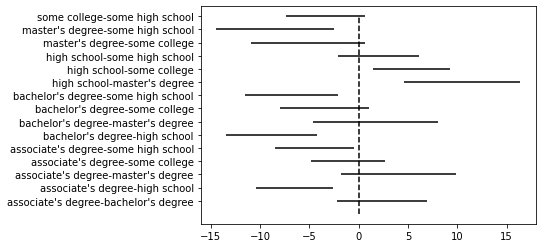

In [ ]:
import matplotlib.pyplot as plt
rows = mc_result.summary().data[1:]
plt.hlines( range(len(rows)), [row[4] for row in rows], [row[5] for row in rows] )
plt.vlines( 0, -1, len( rows )-1, linestyles='dashed' )
plt.gca().set_yticks( range( len( rows ) ) )
plt.gca().set_yticklabels( [ f'{x[0]}-{x[1]}' for x in rows ] )
plt.show()

In [ ]:
!pip install scikit_posthocs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from scikit_posthocs import posthoc_tukey
tukey_df = posthoc_tukey(N_df,val_col="Total", group_col="Parent")
tukey_df

,bachelor's degree,master's degree,associate's degree,some college,high school,some high school
bachelor's degree,1.000000,0.900000,0.651476,0.247564,0.001000,0.001000
master's degree,0.900000,1.000000,0.357377,0.120386,0.001000,0.001000
associate's degree,0.651476,0.357377,1.000000,0.900000,0.001000,0.018313
some college,0.247564,0.120386,0.900000,1.000000,0.001135,0.150820
high school,0.001000,0.001000,0.001000,0.001135,1.000000,0.702230
some high school,0.001000,0.001000,0.018313,0.150820,0.702230,1.000000


In [ ]:
remove = np.tril(np.ones(tukey_df.shape), k=0).astype("bool")
tukey_df[remove] = np.nan

molten_df = tukey_df.melt(ignore_index=False).reset_index().dropna()
molten_df

,index,variable,value
6,bachelor's degree,master's degree,0.900000
12,bachelor's degree,associate's degree,0.651476
13,master's degree,associate's degree,0.357377
18,bachelor's degree,some college,0.247564
19,master's degree,some college,0.120386
20,associate's degree,some college,0.900000
24,bachelor's degree,high school,0.001000
25,master's degree,high school,0.001000
26,associate's degree,high school,0.001000
27,some college,high school,0.001135


In [ ]:
!pip install statannotations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


bachelor's degree vs. master's degree: Custom statistical test, P_val:9.000e-01
master's degree vs. associate's degree: Custom statistical test, P_val:3.574e-01
associate's degree vs. some college: Custom statistical test, P_val:9.000e-01
some college vs. high school: Custom statistical test, P_val:1.135e-03
high school vs. some high school: Custom statistical test, P_val:7.022e-01
bachelor's degree vs. associate's degree: Custom statistical test, P_val:6.515e-01
master's degree vs. some college: Custom statistical test, P_val:1.204e-01
associate's degree vs. high school: Custom statistical test, P_val:1.000e-03
some college vs. some high school: Custom statistical test, P_val:1.508e-01
bachelor's degree vs. some college: Custom statistical test, P_val:2.476e-01
master's degree vs. high school: Custom statistical test, P_val:1.000e-03
associate's degree vs. some high school: Custom statistical test, P_val:1.831e-02
bachelor's degree vs. high school: Custom statistical test, P_val:1.000

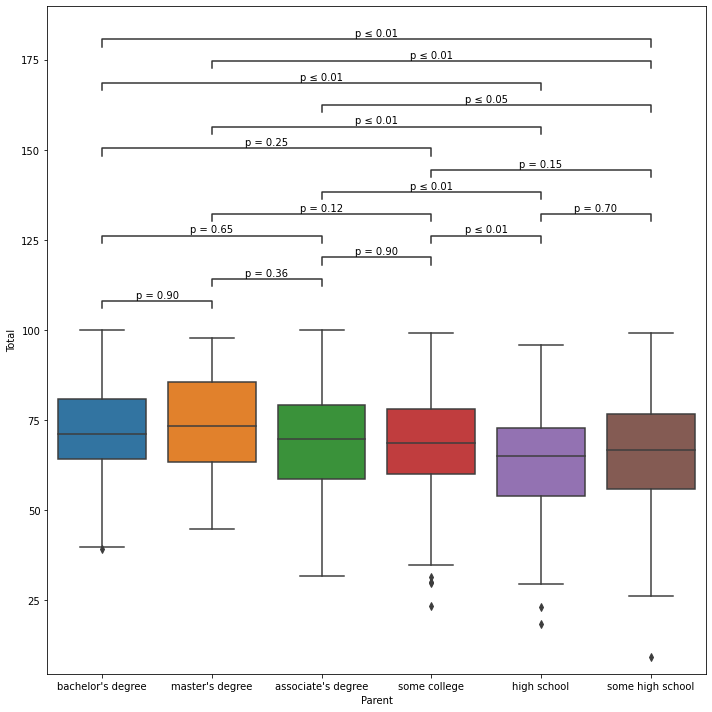

In [ ]:
from statannotations.Annotator import Annotator
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=N_df, x="Parent", y="Total")

pairs = [(i[1]["index"], i[1]["variable"]) for i in molten_df.iterrows()]
p_values = [i[1]["value"] for i in molten_df.iterrows()]

annotator = Annotator(
    ax, pairs, data=N_df, x="Parent", y="Total")
annotator.configure(text_format="simple", loc="inside")
annotator.set_pvalues_and_annotate(p_values)
plt.tight_layout()

In [ ]:
JJ.to_csv('/content/gdrive/MyDrive/研究所課程/統計分析程式/資料集/JJ.csv')

隨機抽樣

complete


In [ ]:
df_shs1 = df_co[df_co['parental level of education']=="some high school"]
df_hs1 = df_co[df_co['parental level of education']=="high school"]
df_ad1 = df_co[df_co['parental level of education']=="associate's degree"]
df_sc1 = df_co[df_co['parental level of education']=="some college"]
df_bd1 = df_co[df_co['parental level of education']=="bachelor's degree"]
df_md1 = df_co[df_co['parental level of education']=="master's degree"]

In [ ]:
df_shs1 = df_shs1.sample(n=20,random_state=25,axis=0)
df_hs1 = df_hs1.sample(n=20,random_state=25,axis=0)
df_ad1 = df_ad1.sample(n=20,random_state=25,axis=0)
df_sc1 = df_sc1.sample(n=20,random_state=25,axis=0)
df_bd1 = df_bd1.sample(n=20,random_state=25,axis=0)
df_md1 = df_md1.sample(n=20,random_state=25,axis=0)

In [ ]:
df_mix1 = df_md1.append(df_shs1)
df_mix1 = df_mix1.append(df_ad1)
df_mix1 = df_mix1.append(df_bd1)
df_mix1 = df_mix1.append(df_hs1)
df_mix1 = df_mix1.append(df_sc1)

In [ ]:
df_mix1 = df_mix1.reset_index(drop=True)
df_mix1

,gender,race/ethnicity,parental level of education,lunch,test preparation course,Total
0,male,group D,master's degree,free/reduced,completed,87.67
1,female,group B,master's degree,free/reduced,completed,89.33
2,female,group C,master's degree,standard,completed,86.33
3,female,group D,master's degree,free/reduced,completed,57.33
4,female,group C,master's degree,free/reduced,completed,75.67
...,...,...,...,...,...,...
115,male,group D,some college,standard,completed,60.33
116,female,group D,some college,free/reduced,completed,78.67
117,female,group C,some college,free/reduced,completed,59.00
118,female,group B,some college,standard,completed,60.00


none

In [ ]:
df_shs2 = df_no[df_no['parental level of education']=="some high school"]
df_hs2 = df_no[df_no['parental level of education']=="high school"]
df_ad = df_no[df_no['parental level of education']=="associate's degree"]
df_sc = df_no[df_no['parental level of education']=="some college"]
df_bd = df_no[df_no['parental level of education']=="bachelor's degree"]
df_md = df_no[df_no['parental level of education']=="master's degree"]

In [ ]:
df_shs2 = df_shs2.sample(n=20,random_state=25,axis=0)
df_hs2 = df_hs2.sample(n=20,random_state=25,axis=0)
df_ad = df_ad.sample(n=20,random_state=25,axis=0)
df_sc = df_sc.sample(n=20,random_state=2,axis=0)
df_bd = df_bd.sample(n=20,random_state=25,axis=0)
df_md = df_md.sample(n=20,random_state=25,axis=0)

In [ ]:
df_mix3 = df_md.append(df_shs2)
df_mix3 = df_mix3.append(df_ad)
df_mix3 = df_mix3.append(df_bd)
df_mix3 = df_mix3.append(df_hs2)
df_mix3 = df_mix3.append(df_sc)

In [ ]:
df_mix3 = df_mix3.reset_index(drop=True)
df_mix3

總和

In [ ]:
df_mix = df_mix3.append(df_mix1)
df_mix = df_mix.reset_index(drop=True)

In [ ]:
df_mix = df_mix.drop('race/ethnicity',axis=1)
df_mix = df_mix.drop('lunch',axis=1)
df_mix = df_mix.drop('gender',axis=1)

A因子

In [ ]:
a1 = df_mix[df_mix['test preparation course']=="none"]
b1 = df_mix[df_mix['test preparation course']=="completed"]

In [ ]:
aa1 = a1.iloc[:,2:3]
bb1 = b1.iloc[:,2:3]

In [ ]:
aaa1 = aa1.to_numpy().flatten()
bbb1 = bb1.to_numpy().flatten()

In [ ]:
stats.shapiro(aaa1)

In [ ]:
stats.shapiro(bbb1)

In [ ]:
stats.levene(aaa1,bbb1)

B因子

In [ ]:
a = df_mix[df_mix['parental level of education']=="some high school"]
b = df_mix[df_mix['parental level of education']=="high school"]
c = df_mix[df_mix['parental level of education']=="associate's degree"]
d = df_mix[df_mix['parental level of education']=="some college"]
e = df_mix[df_mix['parental level of education']=="bachelor's degree"]
f = df_mix[df_mix['parental level of education']=="master's degree"]

In [ ]:
aa = a.iloc[:,2:3]
bb = b.iloc[:,2:3]
cc = c.iloc[:,2:3]
dd = d.iloc[:,2:3]
ee = e.iloc[:,2:3]
ff = f.iloc[:,2:3]

In [ ]:
aaa = aa.to_numpy().flatten()
bbb = bb.to_numpy().flatten()
ccc = cc.to_numpy().flatten()
ddd = dd.to_numpy().flatten()
eee = ee.to_numpy().flatten()
fff = ff.to_numpy().flatten()

In [ ]:
stats.shapiro(aaa)

In [ ]:
stats.shapiro(bbb)

In [ ]:
stats.shapiro(ccc)

In [ ]:
stats.shapiro(ddd)

In [ ]:
stats.shapiro(eee)

In [ ]:
stats.shapiro(fff)

In [ ]:
stats.levene(aaa,bbb,ccc,ddd,eee,fff)

Two way ANOVA

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
df1 = df_mix['Total'].to_numpy()
df2 = df_mix['parental level of education'].to_numpy()
df3 = df_mix['test preparation course'].to_numpy()

In [ ]:
N_df = pd.DataFrame({'Total':df1,'Parent':df2,'Test':df3})

In [ ]:
N_df

In [ ]:
mod = ols('Total ~ Parent+Test+Parent:Test', data = N_df).fit()
sm.stats.anova_lm(mod, typ = 2)

In [ ]:
a1 = df_co[df_co['parental level of education']=="some high school"]
b1 = df_co[df_co['parental level of education']=="high school"]
c1 = df_co[df_co['parental level of education']=="associate's degree"]
d1 = df_co[df_co['parental level of education']=="some college"]
e1 = df_co[df_co['parental level of education']=="bachelor's degree"]
f1 = df_co[df_co['parental level of education']=="master's degree"]

In [ ]:
a1 = a1.drop('parental level of education',axis=1)
a1 = a1.rename(columns={'Total':"some high school"})
a1 = a1.reset_index(drop=True)
b1 = b1.drop('parental level of education',axis=1)
b1 = b1.rename(columns={'Total':"high school"})
b1 = b1.reset_index(drop=True)
c1 = c1.drop('parental level of education',axis=1)
c1 = c1.rename(columns={'Total':"associate's degree"})
c1 = c1.reset_index(drop=True)
d1 = d1.drop('parental level of education',axis=1)
d1 = d1.rename(columns={'Total':"some college"})
d1 = d1.reset_index(drop=True)
e1 = e1.drop('parental level of education',axis=1)
e1 = e1.rename(columns={'Total':"bachelor's degree"})
e1 = e1.reset_index(drop=True)
f1 = f1.drop('parental level of education',axis=1)
f1 = f1.rename(columns={'Total':"master's degree"})
f1 = f1.reset_index(drop=True)

In [ ]:
f1= pd.Series(f1["master's degree"].values,name="master's degree")
e1 = pd.Series(e1["bachelor's degree"].values,name="bachelor's degree")
d1 = pd.Series(d1["some college"].values,name="some college")
c1 = pd.Series(c1["associate's degree"].values,name="associate's degree")
b1 = pd.Series(b1["high school"].values,name="high school")
a1 = pd.Series(a1["some high school"].values,name="some high school")

In [ ]:
Fin_df_com = pd.concat([a1,b1,c1,d1,e1,f1],axis=1)

In [ ]:
a2 = df_no[df_no['parental level of education']=="some high school"]
b2 = df_no[df_no['parental level of education']=="high school"]
c2 = df_no[df_no['parental level of education']=="associate's degree"]
d2 = df_no[df_no['parental level of education']=="some college"]
e2 = df_no[df_no['parental level of education']=="bachelor's degree"]
f2 = df_no[df_no['parental level of education']=="master's degree"]

In [ ]:
a2 = a2.drop('parental level of education',axis=1)
a2 = a2.rename(columns={'Total':"some high school"})
a2 = a2.reset_index(drop=True)

b2 = b2.drop('parental level of education',axis=1)
b2 = b2.rename(columns={'Total':"high school"})
b2 = b2.reset_index(drop=True)

c2 = c2.drop('parental level of education',axis=1)
c2 = c2.rename(columns={'Total':"associate's degree"})
c2 = c2.reset_index(drop=True)

d2 = d2.drop('parental level of education',axis=1)
d2 = d2.rename(columns={'Total':"some college"})
d2 = d2.reset_index(drop=True)

e2 = e2.drop('parental level of education',axis=1)
e2 = e2.rename(columns={'Total':"bachelor's degree"})
e2 = e2.reset_index(drop=True)

f2 = f2.drop('parental level of education',axis=1)
f2 = f2.rename(columns={'Total':"master's degree"})
f2 = f2.reset_index(drop=True)

In [ ]:
f2= pd.Series(f2["master's degree"].values,name="master's degree")
e2 = pd.Series(e2["bachelor's degree"].values,name="bachelor's degree")
d2 = pd.Series(d2["some college"].values,name="some college")
c2 = pd.Series(c2["associate's degree"].values,name="associate's degree")
b2 = pd.Series(b2["high school"].values,name="high school")
a2 = pd.Series(a2["some high school"].values,name="some high school")

In [ ]:
Fin_df_none = pd.concat([a2,b2,c2,d2,e2,f2],axis=1)

In [ ]:
Fin_df_none.describe()

In [ ]:
Fin_df_com.describe()